# Introdução a Processamento de Imagens

**Objetivos da aula:**

*   Conhecer o que é uma imagem digital
*   Conhecer como fazer leitura e exibição de imagens
*   conhecer algumas propriedades de imagens
*   conhecer canais de cores de imagens


# Representação e visulalização da imagem

Uma imagem digital nada mais é que uma uma matriz de linhas e colunas, onde cada posição desta matriz contem o valor de um *pixel*.

O valor de cada pixel representa a intensidade de cor naquele ponto especifico. 


In [1]:
%matplotlib inline
# Importando a biblioteca OpenCV
import cv2 

# Importe da biblioteca para exibir gráficos 
from matplotlib import pyplot as plt


print ("OpenCV Versão : %s " % cv2.__version__)

OpenCV Versão : 4.5.2 


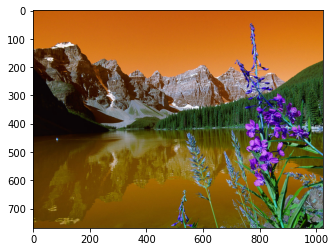

In [2]:
image = cv2.imread("NATUREZA_1.jpg")

#Exibe a imagem na tela usando matplot
plt.imshow(image)

A imagem colorida possui três dimensões: as linhas e as colunas da matriz, bem como os canais da imagem. Uma imagem colorida geralmente possui três canais: R (Red - vermelho) G (Green - verde) B (Blue - azul)

Mas porque a imagem é mostrada de modo estranho pelo pacote matplotlib? Porque a OpenCV representa os canais da imagem na ordem B - G - R, e não R - G - B como é esperado pela maior parte das bibliotecas.

Assim, para podermos visualizar corretamente uma imagem do OpenCV com matplotlib, precisamos inverter os canais, como no código abaixo:


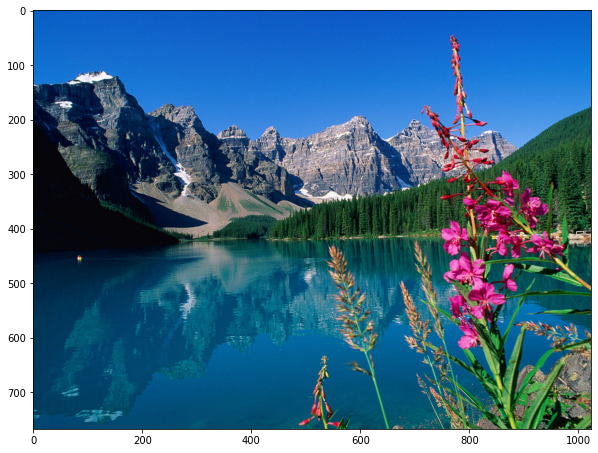

In [3]:
# Converte a imagem para o padrão RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.figure(figsize = (10,10))
plt.imshow(image_rgb)
plt.show()

In [4]:
# Outro método de exibir imagem usando o método imshow da cv2
# Use o ESC para fechara tela

cv2.imshow("img", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Mostrando a representação interna da imagem
print("Dimensões da imagem: ", image_rgb.shape)
print("Quantidade de linhas: ", image_rgb.shape[0])
print("Quantidade de colunas: ", image_rgb.shape[1])
print("Camadas de cores: ", image_rgb.shape[2])

Dimensões da imagem:  (768, 1024, 3)
Quantidade de linhas:  768
Quantidade de colunas:  1024
Camadas de cores:  3


In [6]:
# Mostrando a representação interna da imagem
print("Dimensões da imagem: \n", image_rgb)


Dimensões da imagem: 
 [[[ 10  92 194]
  [ 12  94 196]
  [ 12  95 197]
  ...
  [  6  98 201]
  [  5  97 200]
  [  2  95 198]]

 [[ 11  93 195]
  [ 11  94 196]
  [ 11  94 196]
  ...
  [  6  98 201]
  [  6  98 201]
  [  4  97 200]]

 [[ 11  94 196]
  [ 11  94 196]
  [  9  95 196]
  ...
  [  5  97 200]
  [  7  99 202]
  [  7 100 203]]

 ...

 [[  0  69 111]
  [  1  70 112]
  [  1  70 112]
  ...
  [ 11  31   6]
  [ 17  41  17]
  [  6  34   9]]

 [[  0  67 109]
  [  0  69 111]
  [  2  71 113]
  ...
  [ 65 105  68]
  [ 86 135  90]
  [ 82 136  86]]

 [[  0  66 108]
  [  0  69 111]
  [  2  71 113]
  ...
  [ 53 109  62]
  [ 72 138  77]
  [ 74 145  77]]]


A matriz acima é a representação da imagem de forma numérica, é o valor de cada pixel da imagem. Com esta imagem fica complicado. Vamos tentar analisar separando os canais de cores de um pixel específico. 

In [7]:
(b, g, r) = image[50, 50]
print('O pixel (50, 50) tem as seguintes cores:')
print('Vermelho:',r, 'Verde:', g, 'Azul:', b)

O pixel (50, 50) tem as seguintes cores:
Vermelho: 11 Verde: 105 Azul: 203


## Desafio 1

Análise a imagem e correlacione cada posição da matriz com cada pixel da imagem.


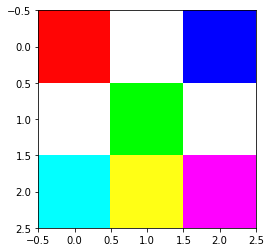

array([[[255,   5,   5],
        [255, 255, 255],
        [  1,   1, 255]],

       [[255, 255, 255],
        [  1, 255,   1],
        [255, 255, 255]],

       [[  2, 255, 255],
        [255, 255,  21],
        [255,   1, 255]]], dtype=uint8)

In [11]:
import cv2



# Carregando a imagem 
imagem = cv2.imread("img3x3.png")
image_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)



plt.imshow(image_rgb)
plt.show();
image_rgb


In [9]:
## sua resposta:  - 

# Imagem em tons de cinza

Em muitos casos trabalhamos com imagens na escala de cinza, logo, a imagem possui apenas 1 canal de cor.

Cuidado com o colormap do matplotlib: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html

(3, 3)


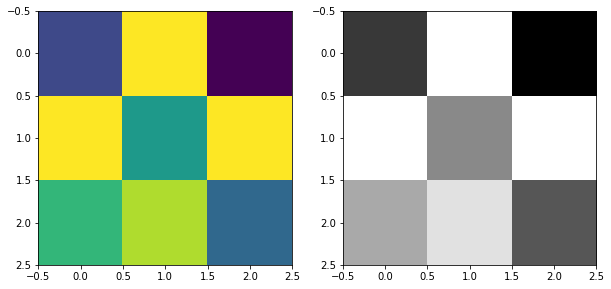

In [13]:
import cv2

# Carregando a imagem na versão tons de cinza (grayscale) de um arquivo
imagem_cinza = cv2.imread("img3x3.png", 0)

print(imagem_cinza.shape)


plt.figure(figsize = (10,10))
plt.subplot(121); plt.imshow(imagem_cinza); # Sem cmap="gray"
plt.subplot(122); plt.imshow(imagem_cinza, cmap="gray") # Com cmap="gray"
plt.show()

# Amostragem da imagem

As imagens capturadas por dispositivos digitais possuem as características de resolução espacial e resolução de cores
Enquanto a resolução de cores afeta o número de cores que podem serr epresentadas na imagem, sua resolução espacial afeta o tamanho que aimagem irá ter. Embora não se possa comparar diretamente a resolução de duas imagens com tamanhos diferentes, a imagem do mesmo objeto, se possui mais pixels, significará que tamém possui maior resolução

O redimensionamento da imagem pode ser feito no OpenCV através co comando `cv2.resize(imagem, tamanho, interpolação)`

O taaho é dado por uma dupla (W,H), onde W é a largura (número de colunas) e H é a altura (número de linhas)

Dimensões da imagem original:  (768, 1024, 3)
Dimensões da imagem nova:  (400, 600, 3)


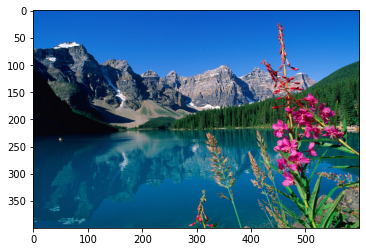

In [14]:
# Carregando a imagem na versão colorida de um arquivo
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread("NATUREZA_1.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)



# Altera as dimensões da imagem
imagem2 = cv2.resize(imagem, (600,400), cv2.INTER_LINEAR)

print("Dimensões da imagem original: ", imagem.shape)
print("Dimensões da imagem nova: ", imagem2.shape)


plt.imshow(imagem2)
plt.show()

## Desafio 3

Escolha uma imagem da sua preferência. Carregue esta imagem, plote e salve duas imagens, a primeira com outro dimensional e a segunda na escala de cinza. 

***Dica:*** O comando para salvar é `cv2.imwrite("nomedoarquivo.jpg",imagem)`

In [15]:
#Implemente aqui sua solução...





# Alterando os valores dos pixels de uma imagem

# Range de valores

Antes de alterar os valores dos pixels temos que entender que a OpenCV trabalha com valores de 8 bits para cada componente de cor ou escala de cinza, quer dizer que os valores possiveis estão no range entre **0** e **2⁸-1**, que é a mesma que dizer entre **0 e 255**. 

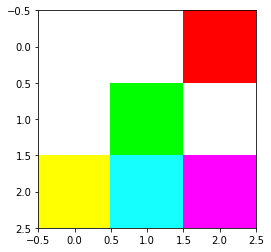

In [18]:
import cv2

# Carregando a imagem 
imagem = cv2.imread("img3x3.png")

## Altera o valor do pixel rm B,G,R
imagem[0,0] = (255,255,255)


plt.imshow(imagem)

# Varredura de uma imagem 

Desenvolver uma rotina capaz de varrer sua imagem pixel a pixel é muito mais interessante para aplicações mais práticas, embora exista tecnicas mais otimizadas e rápidas para essa aplicação, podemos utilizar uma estrutura de dois laços For para passar sobre todas as linhas e todas as colunas da matriz (imagem).

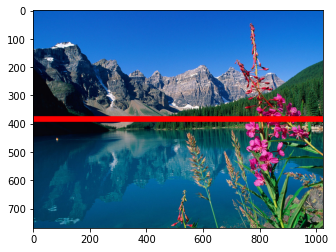

In [19]:
import cv2
imagem = cv2.imread("NATUREZA_1.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

for y in range(0, image.shape[0]):
  for x in range(0, image.shape[1]):

    if y==image.shape[0]/2:
      image[y-10:y+10, :] = (255,0,0)

plt.imshow(image)
plt.show()

# Desafio 5

Utilizando a técnica dos 2 for, implemente uma função que desenha um linha branca na vertical no centro da imagem de largura 50 pixeis.
Dica: use um if para chegar se esta na posição certa (x,y) antes de pintar de branco o pixel.

In [20]:
# Implemente aqui seu código

# Filtro de imagem

É possivel aplicar diversos tipos de filtros. A filtro abaixo é um filtro de limiarização.

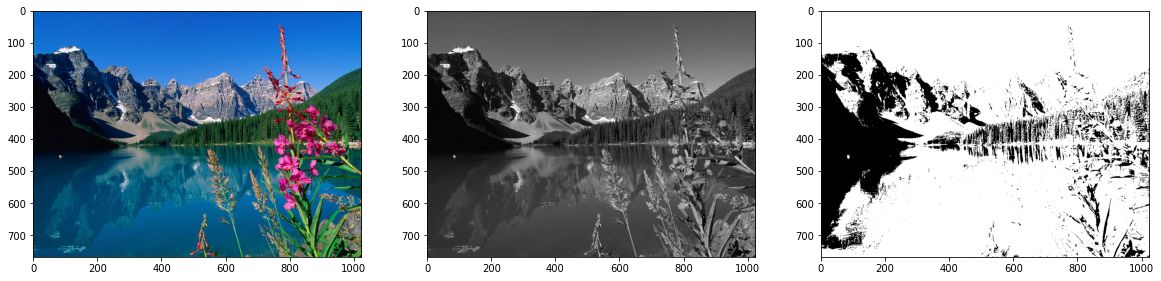

In [21]:
import cv2
imagem = cv2.imread("NATUREZA_1.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

for y in range(0, image.shape[0]):
  for x in range(0, image.shape[1]):
    
    if image[y, x] <= 50:
      image[y,x] = 0
    else:
      image[y,x] = 255


plt.figure(figsize = (20,20))
plt.subplot(131); plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB));
plt.subplot(132); plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY), cmap="gray");
plt.subplot(133); plt.imshow(image, cmap="gray") 
plt.show()

## Desafio 6

Faça uma implementação que inverte as cores de uma imagem em escala de cinza, com valores que vão de 0 ate 255. 
***dica:*** a forma explicita de fazer uma inversãão é: `a = 255 - a`

In [22]:
# Implemente aqui seu código

## Desafio 7 

E se a imagem for colorida?? como fazer a inversão nos canais de cores??

# Seguimentação de imagens

Agora que sabemos como manipular pixel e como alterar seu valor e sua posição. Podemos fazer atividades mais complexas como conseguir reaalizar a seguimentação de algum objeto ou item da imagem (video), Como na imagem abaixo.

## Desafio 8 

De forma intuitiva realize algumas mudanças no código e veja o efeito que causa na imagem. Este exercio é apenas um aperitivo de algumas tecnicas que vamos estudar na proxima aula. Tente segmentar apenas o fundo da imagem. 

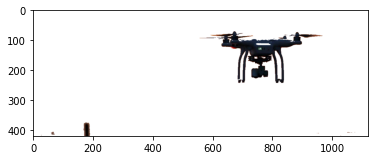

In [23]:
# Entenda o codigo e faça as alterações que achar necessárias
import cv2
imagem = cv2.imread("drone.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)


for y in range(0, image.shape[0]):
  for x in range(0, image.shape[1]):
    
    
    if image[y,x,0] and image[y,x,1] and image[y,x,2] > 70:
      image[y,x]= (255,255,255)
    

plt.imshow(image)
plt.show()